# Data Analysis for Customer Churn Prediction

## Data Cleaning

In [1]:
import pandas as pd

In [2]:
original_df = pd.read_excel("../dataset/customer_churn_large_dataset.xlsx")
original_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
df = original_df

# Dropping unimportant columns
df = df.drop(columns=["Name", "CustomerID"], errors="ignore")
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [4]:
# Checking missing values

print(f"Missing Values:\n\n{df.isna().sum()}")

Missing Values:

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


No missing values in the dataset.

In [5]:
# dropping duplicate rows

df = df.drop_duplicates()
print("Dataset size after removing duplicates:", len(df))

Dataset size after removing duplicates: 100000


No duplicate rows in the dataset

## Exploratory Data Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


### Distributions of numerical features

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Age distribution')]

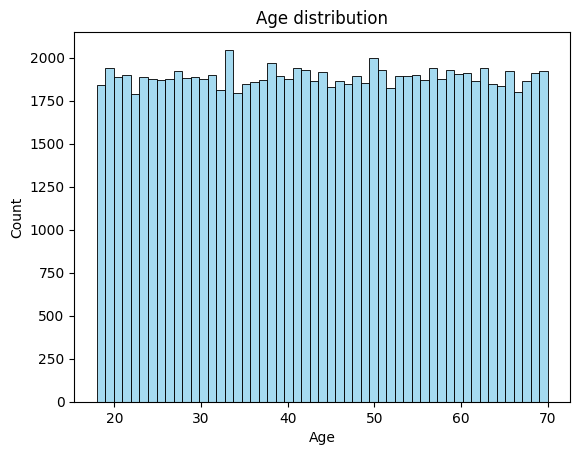

In [8]:
sns.histplot(df, x="Age", bins=df.Age.max()-df.Age.min()+1, color="skyblue").set(title="Age distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Subscription Length distribution')]

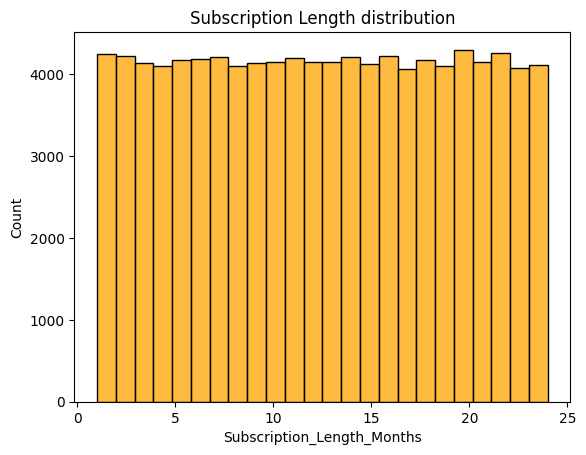

In [9]:
sns.histplot(df, x="Subscription_Length_Months", bins=24, color="orange").set(title="Subscription Length distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Monthly Bill distribution')]

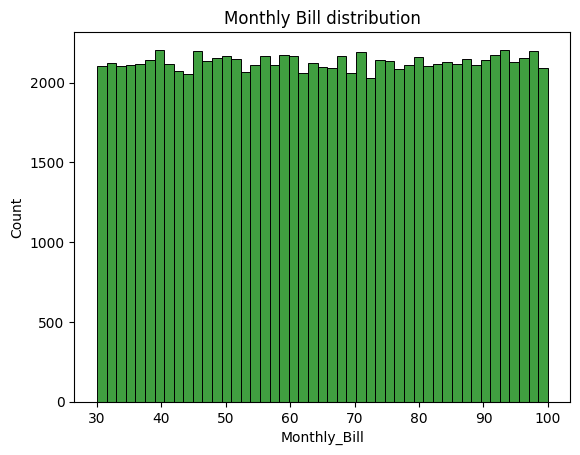

In [10]:
sns.histplot(df, x="Monthly_Bill", color="green").set(title="Monthly Bill distribution")

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Total usage distribution')]

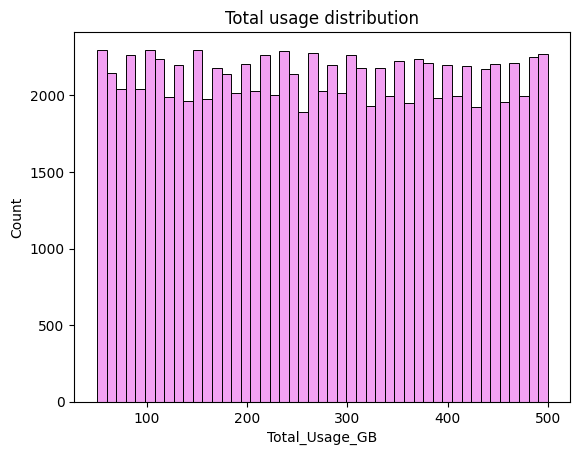

In [11]:
sns.histplot(df, x="Total_Usage_GB", color="violet").set(title="Total usage distribution")

All Numerical features are uniformly distributed.

### Distribution of categorical columns

Churning Customers: 49779
Not Churning Customers: 50221


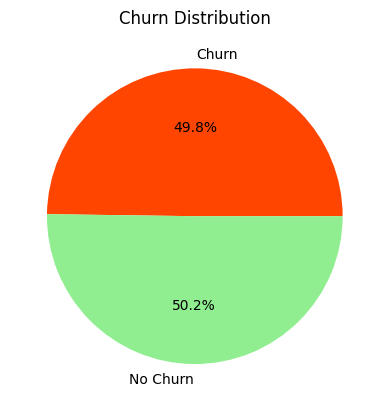

In [12]:
churn_dist = [(df.Churn==1).sum(), (df.Churn==0).sum()]
print("Churning Customers:", churn_dist[0])
print("Not Churning Customers:", churn_dist[1])

plt.pie(churn_dist, labels=["Churn", "No Churn"],
        autopct="%1.1f%%", colors=["orangered", "lightgreen"])
plt.title("Churn Distribution")
plt.show()

Male Customers: 49784
Female Customers: 50216


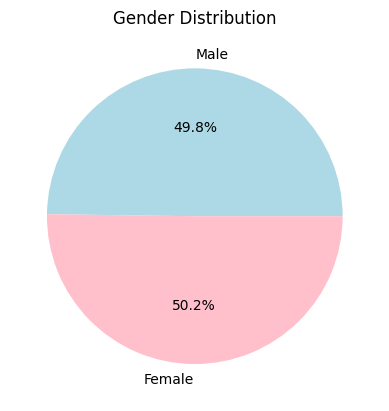

In [13]:
gen_dist = [(df.Gender=="Male").sum(), (df.Gender=="Female").sum()]
print("Male Customers:", gen_dist[0])
print("Female Customers:", gen_dist[1])

plt.pie(gen_dist, labels=["Male", "Female"],
        autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Gender Distribution")
plt.show()

{'Los Angeles': 20041, 'New York': 19813, 'Miami': 20031, 'Chicago': 19958, 'Houston': 20157}


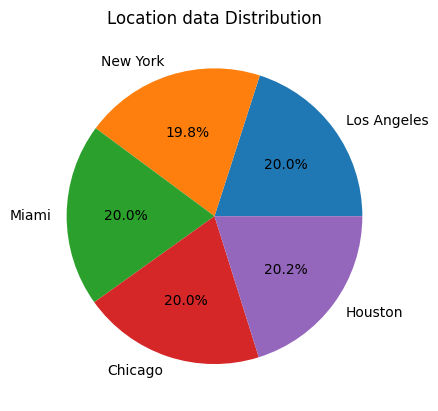

In [14]:
loc_labels = df.Location.unique()
loc_dist = [(df.Location==x).sum() for x in loc_labels]
print({x: y for x, y in zip(loc_labels, loc_dist)})

plt.pie(loc_dist, labels=loc_labels, autopct="%1.1f%%")
plt.title("Location data Distribution")
plt.show()

The dataset is perfectly balanced for all categorical columns

### Correlation between feature columns and customer churn

<Axes: >

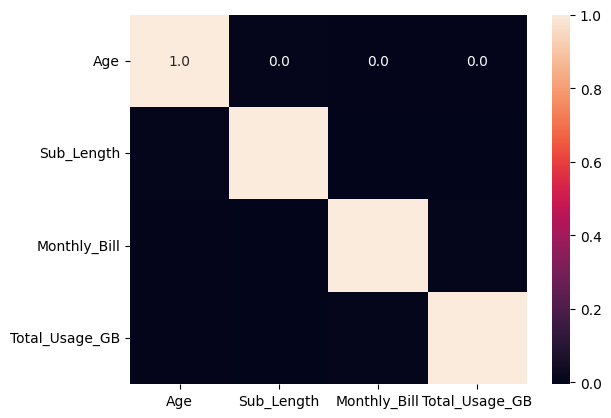

In [15]:
sns.heatmap(df[["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]]
            .rename(columns={"Subscription_Length_Months": "Sub_Length"}).corr(),
            annot=True, fmt=".1f")


There is no correlation between numerical columns.

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Churn'>

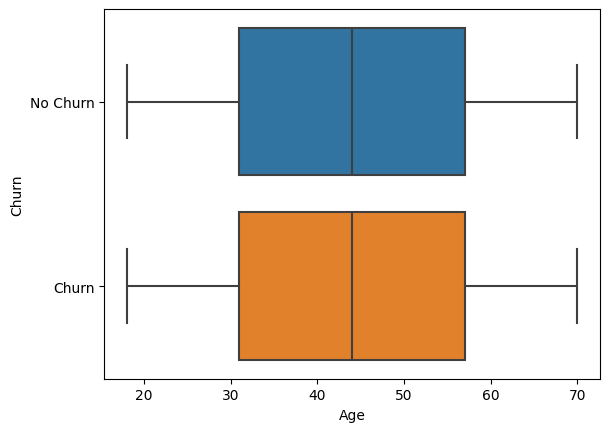

In [16]:
sns.boxplot(df, x = "Age", y=df.Churn.apply(lambda x: "Churn" if x==1 else "No Churn"))

Age has no effect on churn.

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Subscription_Length_Months', ylabel='Churn'>

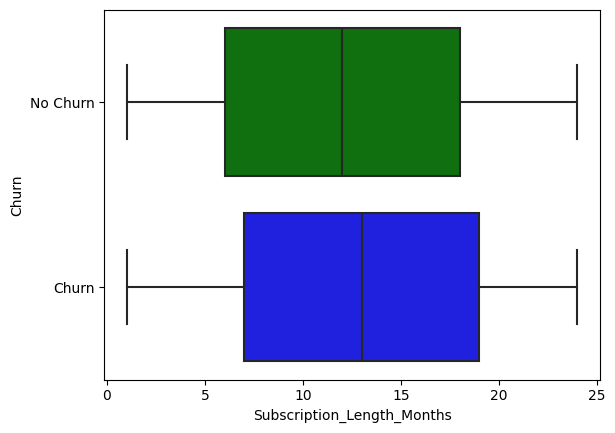

In [17]:
sns.boxplot(df, x = "Subscription_Length_Months", y=df.Churn.apply(lambda x: "Churn" if x==1 else "No Churn"),
            palette=["green", "blue"])

Increase in subscription length slightly increases churn rate.

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Monthly_Bill', ylabel='Churn'>

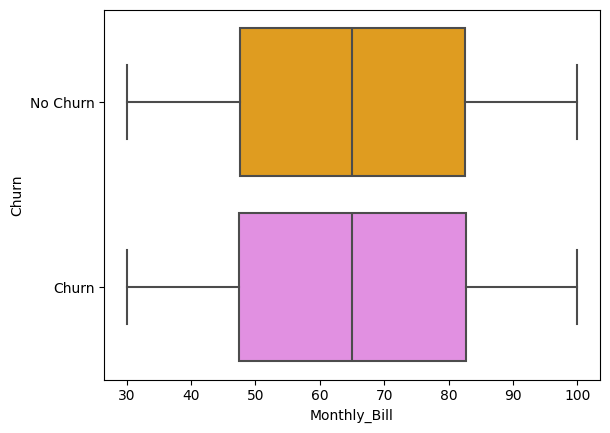

In [18]:
sns.boxplot(df, x = "Monthly_Bill", y=df.Churn.apply(lambda x: "Churn" if x==1 else "No Churn"),
            palette=["orange", "violet"])

Monthly bill has no effect on churn.

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_Usage_GB', ylabel='Churn'>

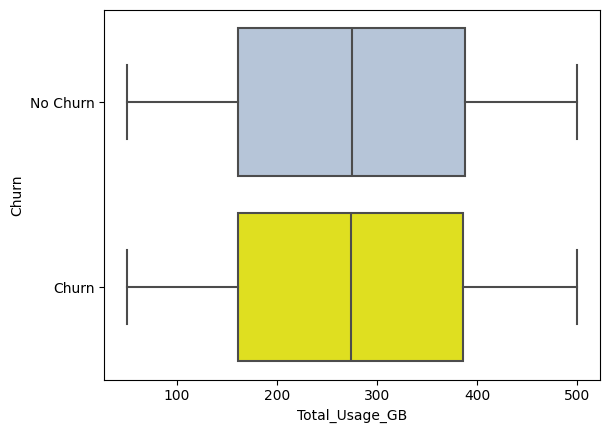

In [19]:
sns.boxplot(df, x = "Total_Usage_GB", y=df.Churn.apply(lambda x: "Churn" if x==1 else "No Churn"),
            palette=["lightsteelblue", "yellow"])

Total data usage has no effect on churn.

**There are no outliers in any dataset column.**

### Additional information about the data

#### Which Age group consumes internet the most?

e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Sunbase_Customer_Churn\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age', ylabel='Total_Usage_GB'>

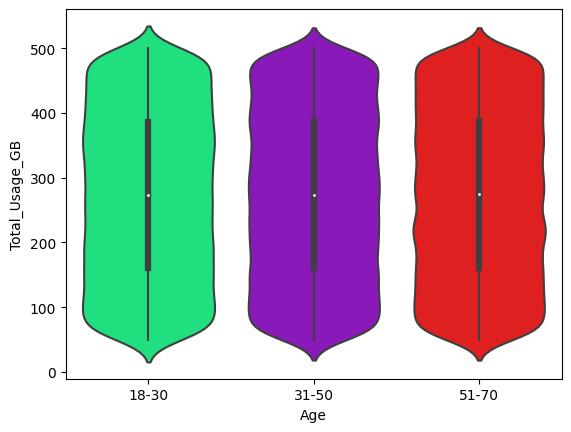

In [20]:
bins = [18, 31, 51, df.Age.max()+1]
age_labels = ["18-30", "31-50", "51-70"]
age_groups = pd.cut(df.Age, bins, labels=age_labels, right=False)

sns.violinplot(df, y="Total_Usage_GB", x=age_groups, palette=["springgreen", 'darkviolet', 'red'])

All ages consume internet similarly.